In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
import math
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

In [2]:
df= pd.read_csv('titanic-training-data.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### Analyse the Data

<AxesSubplot:xlabel='Survived', ylabel='count'>

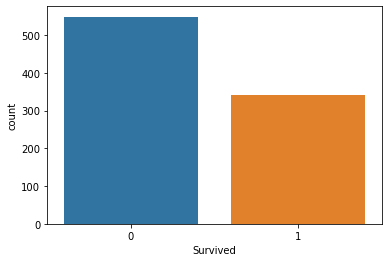

In [8]:
sns.countplot(x="Survived" , data= df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

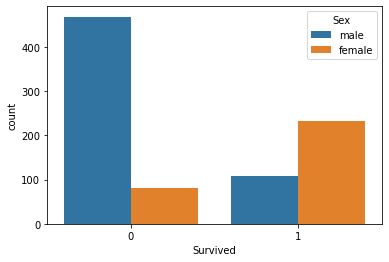

In [9]:
sns.countplot(x="Survived", hue="Sex" , data= df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

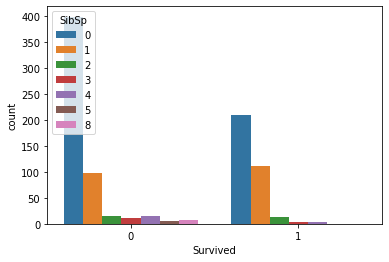

In [10]:
sns.countplot(x="Survived", hue="SibSp" , data= df)

### DATA WRANGLING

In [11]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

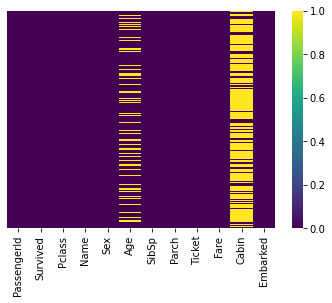

In [12]:
sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis")

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

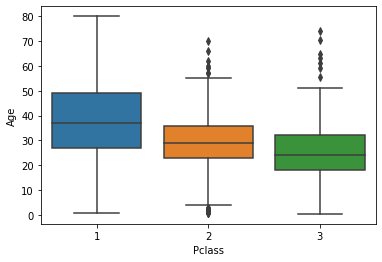

In [13]:
sns.boxplot(x="Pclass", y="Age" ,data=df)

In [14]:
df.drop("Cabin",axis=1,inplace=True)

In [15]:
df.dropna(inplace=True)

<AxesSubplot:>

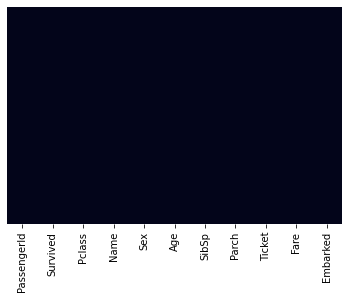

In [16]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [17]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [18]:
Sex = pd.get_dummies(df["Sex"])
Sex.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [19]:
Embarked = pd.get_dummies(df["Embarked"])
Embarked.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [20]:
embarked = pd.get_dummies(df["Embarked"],drop_first=True)
embarked.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [21]:
Pcl = pd.get_dummies(df["Pclass"],drop_first=True)
Pcl.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [22]:

df=pd.concat([df,Sex,embarked,Pcl],axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,female,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,0,1,0,1


In [23]:
df.drop(["Sex","Embarked","PassengerId","Name","Ticket","Pclass","Fare"],axis=1,inplace=True)
df.head()

,Survived,Age,SibSp,Parch,female,male,Q,S,2,3
0,0,22.0,1,0,0,1,0,1,0,1
1,1,38.0,1,0,1,0,0,0,0,0
2,1,26.0,0,0,1,0,0,1,0,1
3,1,35.0,1,0,1,0,0,1,0,0
4,0,35.0,0,0,0,1,0,1,0,1


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [25]:
X=df.drop("Survived",axis=1)
y=df["Survived"]

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30,random_state=42)

### fit model

In [27]:
model = LogisticRegression()
model.fit(X_train,y_train)

C:\Users\Akhil\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
predictions=model.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.7897196261682243

### build decision tree model

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
dTree = DecisionTreeClassifier(criterion='gini' ,random_state=42 )

In [32]:
dTree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

### score

In [33]:
print(dTree.score(X_train,y_train))
print(dTree.score(X_test,y_test))

0.9578313253012049
0.7616822429906542


#### limiting overfitting

In [34]:
dTree = DecisionTreeClassifier(criterion='gini',max_depth=4 ,random_state=42 )
dTree.fit(X_train,y_train)
print(dTree.score(X_train,y_train))
print(dTree.score(X_test,y_test))

0.8373493975903614
0.7616822429906542


In [35]:
print(dTree.score(X_train,y_train)-dTree.score(X_test,y_test))


0.07566715459970719


In [36]:
dTree = DecisionTreeClassifier(criterion='entropy',max_depth=4 ,random_state=42 )
dTree.fit(X_train,y_train)
print(dTree.score(X_train,y_train))
print(dTree.score(X_test,y_test))

0.8333333333333334
0.7523364485981309


In [37]:
print(dTree.score(X_train,y_train)-dTree.score(X_test,y_test))

0.0809968847352025


# ENCEMBLE LEARNING

In [40]:
from sklearn.ensemble import BaggingClassifier

bgcl =BaggingClassifier(n_estimators =50 , base_estimator =dTree,random_state=42)

bgcl =bgcl.fit(X_train,y_train)

0.780373831775701


<AxesSubplot:>

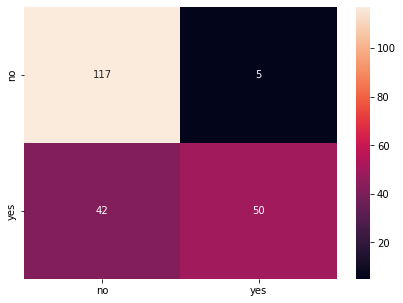

In [44]:
y_predict =bgcl.predict(X_test)
print(bgcl.score(X_test ,y_test))
cm =metrics.confusion_matrix(y_test,y_predict,labels =[0,1])

df_cm =pd.DataFrame(cm,index =[i for i in ["no","yes"]],
                   columns =[i for i in ["no","yes"]])
plt.figure(figsize =(7,5))

sns.heatmap(df_cm,annot =True, fmt ='g')


In [45]:
# same bagging classifier with diabeties data

In [46]:
df1 =pd.read_csv("pima-indians-diabetes-2.csv")

In [47]:
from sklearn.ensemble import BaggingClassifier

bgcl =BaggingClassifier(n_estimators =50 , base_estimator =dTree,random_state=42)

bgcl =bgcl.fit(X_train,y_train)

0.780373831775701


<AxesSubplot:>

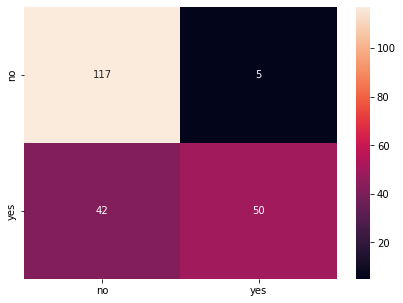

In [48]:
y_predict =bgcl.predict(X_test)
print(bgcl.score(X_test ,y_test))
cm =metrics.confusion_matrix(y_test,y_predict,labels =[0,1])

df_cm =pd.DataFrame(cm,index =[i for i in ["no","yes"]],
                   columns =[i for i in ["no","yes"]])
plt.figure(figsize =(7,5))

sns.heatmap(df_cm,annot =True, fmt ='g')

In [50]:
# build the decision tree model and then do the bagging algorithm 
#for that decision tree

# EnsEMble learning-Gradient descent

In [54]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators =50 ,random_state =42)
gbcl =gbcl.fit(X_train,y_train)

0.7710280373831776


<AxesSubplot:>

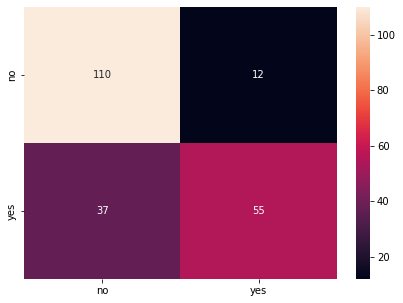

In [55]:
y_predict =gbcl.predict(X_test)
print(gbcl.score(X_test,y_test))
cm =metrics.confusion_matrix(y_test,y_predict,labels =[0,1])
df_cm =pd.DataFrame(cm,index =[i for i in ["no","yes"]],
                   columns =[i for i in ["no","yes"]])
plt.figure(figsize =(7,5))

sns.heatmap(df_cm,annot =True, fmt ='g')

# ENSEMBLE RANDOM FOREST


In [97]:
from sklearn.ensemble import RandomForestClassifier
rfcl = GradientBoostingClassifier(n_estimators =100 ,random_state =42,max_features =3)
rfcl =rfcl.fit(X_train,y_train)

0.794392523364486


<AxesSubplot:>

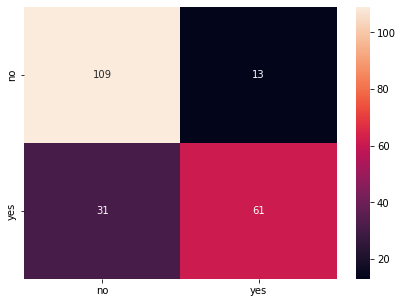

In [98]:
y_predict =rfcl.predict(X_test)
print(rfcl.score(X_test,y_test))
cm =metrics.confusion_matrix(y_test,y_predict,labels =[0,1])
df_cm =pd.DataFrame(cm,index =[i for i in ["no","yes"]],
                   columns =[i for i in ["no","yes"]])
plt.figure(figsize =(7,5))

sns.heatmap(df_cm,annot =True, fmt ='g')

In [99]:
# LOAN PREDICTION DESISION TREE

In [100]:
#import pandas as pd
#import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
import math

In [103]:
df =pd.read_csv("loan_prediction.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [105]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [106]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [107]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [108]:
#analyse the data

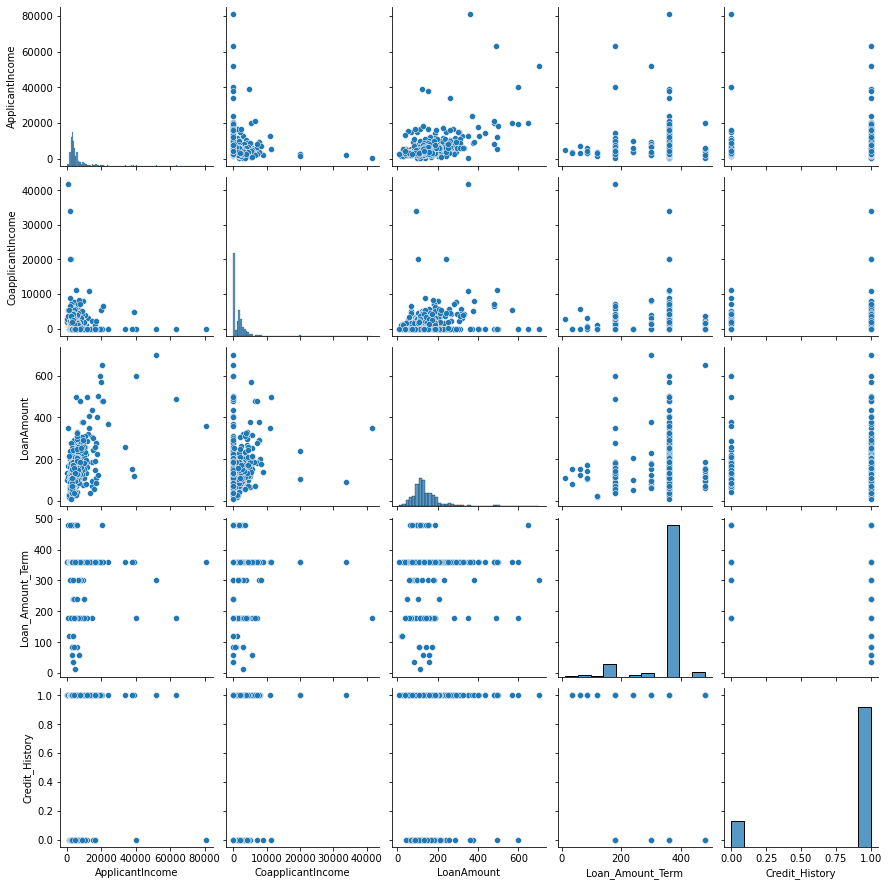

In [109]:
sns.pairplot(df)

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

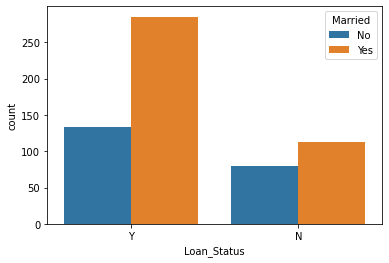

In [110]:
sns.countplot(x ="Loan_Status",hue ="Married",data =df)

In [111]:
#data wrangling

<AxesSubplot:>

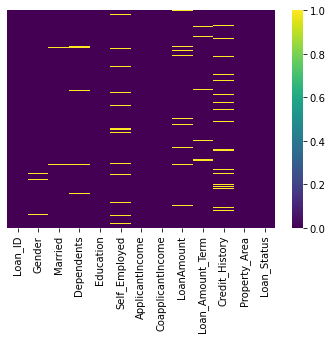

In [112]:
sns.heatmap(df.isnull(),yticklabels =False,cmap ='viridis')

In [113]:
df.dropna(inplace =True)

<AxesSubplot:>

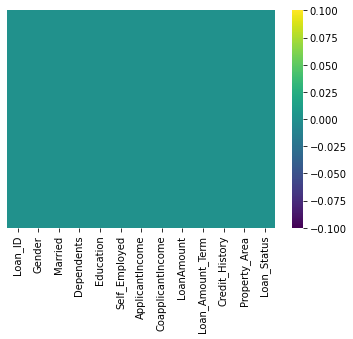

In [114]:
sns.heatmap(df.isnull(),yticklabels =False,cmap ='viridis')

In [115]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [128]:
Gender1 =pd.get_dummies(df["Gender"],drop_first =True)
Gender1.head()

,Male
1,1
2,1
3,1
4,1
5,1


In [129]:
Married1=pd.get_dummies(df["Married"],drop_first =True)
Married1.head()

,Yes
1,1
2,1
3,1
4,0
5,1


In [120]:
df.shape

(480, 13)

In [121]:
# replace NAN with mediam or mean this is the other method of data cleaning

In [130]:
Education1=pd.get_dummies(df["Education"],drop_first =True)
Education1.head()

,Not Graduate
1,0
2,0
3,1
4,0
5,0


In [131]:
Self_Employed1=pd.get_dummies(df["Self_Employed"],drop_first =True)
Self_Employed1.head()

,Yes
1,0
2,1
3,0
4,0
5,1


In [132]:
Property_Area1=pd.get_dummies(df["Property_Area"],drop_first =True)
Property_Area1.head()

,Semiurban,Urban
1,0,0
2,0,1
3,0,1
4,0,1
5,0,1


In [133]:
df =pd.concat([df,Gender1,Property_Area1,Self_Employed1,Education1,Married1],axis=1)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,Urban,Yes,Not Graduate,Yes,Male,Semiurban,Urban,Yes,Not Graduate,Yes
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,...,0,0,0,1,1,0,0,0,0,1
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,...,1,1,0,1,1,0,1,1,0,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,...,1,0,1,1,1,0,1,0,1,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,...,1,0,0,0,1,0,1,0,0,0
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,...,1,1,0,1,1,0,1,1,0,1


In [135]:
df.drop(["Gender","Married","Education","Self_Employed","Property_Area"],axis=1,inplace=True)
df.head()

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Male,Semiurban,Urban,Yes,Not Graduate,Yes,Male,Semiurban,Urban,Yes,Not Graduate,Yes
1,LP001003,1,4583,1508.0,128.0,360.0,1.0,N,1,0,0,0,0,1,1,0,0,0,0,1
2,LP001005,0,3000,0.0,66.0,360.0,1.0,Y,1,0,1,1,0,1,1,0,1,1,0,1
3,LP001006,0,2583,2358.0,120.0,360.0,1.0,Y,1,0,1,0,1,1,1,0,1,0,1,1
4,LP001008,0,6000,0.0,141.0,360.0,1.0,Y,1,0,1,0,0,0,1,0,1,0,0,0
5,LP001011,2,5417,4196.0,267.0,360.0,1.0,Y,1,0,1,1,0,1,1,0,1,1,0,1


In [136]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Male,Semiurban,Urban,Yes,Not Graduate,Yes,Male,Semiurban,Urban,Yes,Not Graduate,Yes
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167,0.820833,0.397917,0.312500,0.137500,0.202083,0.647917,0.820833,0.397917,0.312500,0.137500,0.202083,0.647917
std,5668.251251,2617.692267,80.508164,65.212401,0.353307,0.383892,0.489979,0.463996,0.344734,0.401973,0.478118,0.383892,0.489979,0.463996,0.344734,0.401973,0.478118
min,150.000000,0.000000,9.000000,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
